## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.970238 -0.438117 -0.438014  0.320861 -1.181395  0.029259
1  0.013370 -0.173102  0.908976 -1.515848 -1.411898 -1.156461
2 -1.566609  0.193581  0.301494  0.776507  0.236730 -0.637040
3 -0.972697 -0.253224 -0.974868  0.674772  0.261072 -0.034867
4  1.029167  0.734814 -0.725876  1.515309  0.834607  1.794101


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9922137	total: 47ms	remaining: 46.9s
1:	learn: 0.9834787	total: 47.3ms	remaining: 23.6s
2:	learn: 0.9737094	total: 47.7ms	remaining: 15.8s
3:	learn: 0.9650366	total: 48.2ms	remaining: 12s
4:	learn: 0.9552376	total: 48.6ms	remaining: 9.66s
5:	learn: 0.9451240	total: 49ms	remaining: 8.11s
6:	learn: 0.9336109	total: 49.3ms	remaining: 7s
7:	learn: 0.9245659	total: 49.7ms	remaining: 6.16s
8:	learn: 0.9145040	total: 50.1ms	remaining: 5.52s
9:	learn: 0.9055167	total: 50.6ms	remaining: 5.01s
10:	learn: 0.8960730	total: 51ms	remaining: 4.59s
11:	learn: 0.8854180	total: 51.4ms	remaining: 4.23s
12:	learn: 0.8748605	total: 51.7ms	remaining: 3.92s
13:	learn: 0.8658698	total: 52.1ms	remaining: 3.67s
14:	learn: 0.8581482	total: 52.4ms	remaining: 3.44s
15:	learn: 0.8491887	total: 52.8ms	remaining: 3.25s
16:	learn: 0.8400914	total: 53.2ms	remaining: 3.08s
17:	learn: 0.8314824	total: 53.6ms	remaining: 2.92s
18:	learn: 0.8231781	total: 53.9ms	remaining: 2.78s
19:

200:	learn: 0.1773994	total: 122ms	remaining: 486ms
201:	learn: 0.1760062	total: 123ms	remaining: 485ms
202:	learn: 0.1746975	total: 123ms	remaining: 483ms
203:	learn: 0.1736183	total: 123ms	remaining: 482ms
204:	learn: 0.1727195	total: 124ms	remaining: 480ms
205:	learn: 0.1713484	total: 124ms	remaining: 479ms
206:	learn: 0.1701326	total: 125ms	remaining: 477ms
207:	learn: 0.1690607	total: 125ms	remaining: 476ms
208:	learn: 0.1675882	total: 125ms	remaining: 474ms
209:	learn: 0.1663609	total: 126ms	remaining: 473ms
210:	learn: 0.1650650	total: 126ms	remaining: 472ms
211:	learn: 0.1639655	total: 127ms	remaining: 470ms
212:	learn: 0.1626623	total: 127ms	remaining: 469ms
213:	learn: 0.1614183	total: 127ms	remaining: 468ms
214:	learn: 0.1602076	total: 128ms	remaining: 466ms
215:	learn: 0.1592480	total: 128ms	remaining: 465ms
216:	learn: 0.1584957	total: 128ms	remaining: 464ms
217:	learn: 0.1572481	total: 129ms	remaining: 462ms
218:	learn: 0.1561134	total: 129ms	remaining: 461ms
219:	learn: 

484:	learn: 0.0441910	total: 224ms	remaining: 238ms
485:	learn: 0.0440400	total: 225ms	remaining: 238ms
486:	learn: 0.0438552	total: 225ms	remaining: 237ms
487:	learn: 0.0436751	total: 226ms	remaining: 237ms
488:	learn: 0.0435247	total: 226ms	remaining: 236ms
489:	learn: 0.0433705	total: 226ms	remaining: 236ms
490:	learn: 0.0432946	total: 227ms	remaining: 235ms
491:	learn: 0.0431525	total: 227ms	remaining: 235ms
492:	learn: 0.0430090	total: 228ms	remaining: 234ms
493:	learn: 0.0428517	total: 228ms	remaining: 233ms
494:	learn: 0.0427496	total: 228ms	remaining: 233ms
495:	learn: 0.0425787	total: 229ms	remaining: 232ms
496:	learn: 0.0424332	total: 229ms	remaining: 232ms
497:	learn: 0.0423673	total: 229ms	remaining: 231ms
498:	learn: 0.0422958	total: 230ms	remaining: 231ms
499:	learn: 0.0420947	total: 230ms	remaining: 230ms
500:	learn: 0.0418277	total: 231ms	remaining: 230ms
501:	learn: 0.0415679	total: 231ms	remaining: 229ms
502:	learn: 0.0414046	total: 232ms	remaining: 229ms
503:	learn: 

752:	learn: 0.0118570	total: 327ms	remaining: 107ms
753:	learn: 0.0118158	total: 328ms	remaining: 107ms
754:	learn: 0.0117517	total: 328ms	remaining: 106ms
755:	learn: 0.0117137	total: 328ms	remaining: 106ms
756:	learn: 0.0116511	total: 329ms	remaining: 106ms
757:	learn: 0.0116225	total: 329ms	remaining: 105ms
758:	learn: 0.0115809	total: 329ms	remaining: 105ms
759:	learn: 0.0115437	total: 330ms	remaining: 104ms
760:	learn: 0.0115205	total: 330ms	remaining: 104ms
761:	learn: 0.0115039	total: 331ms	remaining: 103ms
762:	learn: 0.0114868	total: 331ms	remaining: 103ms
763:	learn: 0.0114461	total: 331ms	remaining: 102ms
764:	learn: 0.0114295	total: 332ms	remaining: 102ms
765:	learn: 0.0114020	total: 332ms	remaining: 101ms
766:	learn: 0.0113858	total: 332ms	remaining: 101ms
767:	learn: 0.0113459	total: 333ms	remaining: 100ms
768:	learn: 0.0113302	total: 333ms	remaining: 100ms
769:	learn: 0.0112911	total: 333ms	remaining: 99.6ms
770:	learn: 0.0112804	total: 334ms	remaining: 99.1ms
771:	learn

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

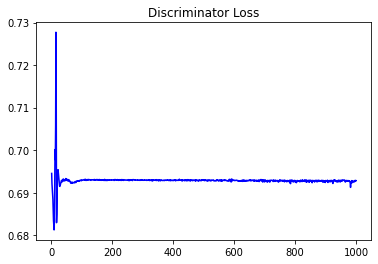

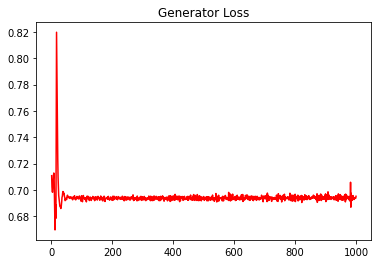

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08045946466213495


#### Sanity Checks 

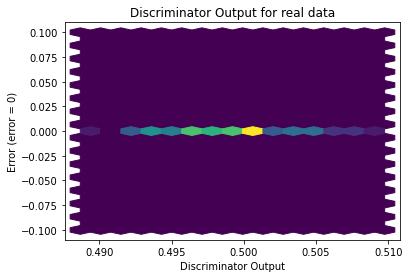

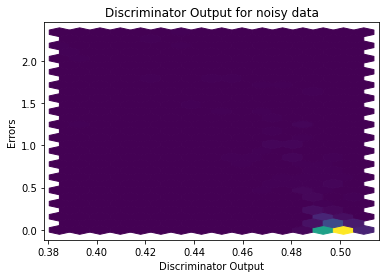

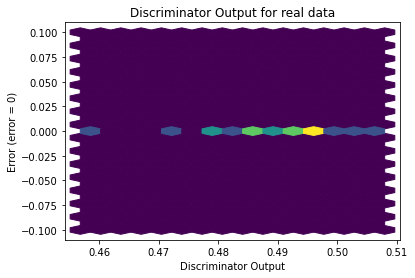

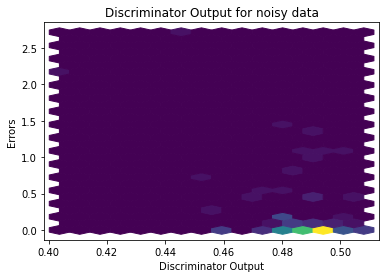

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


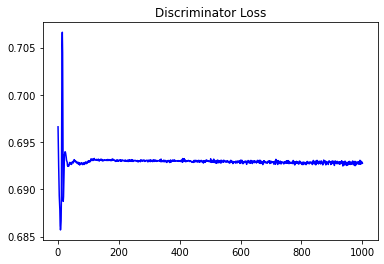

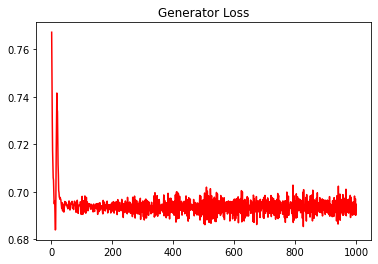

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07680341904112069


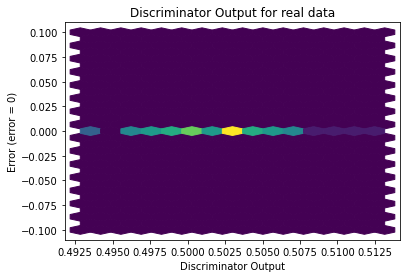

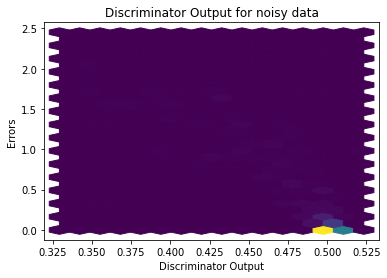

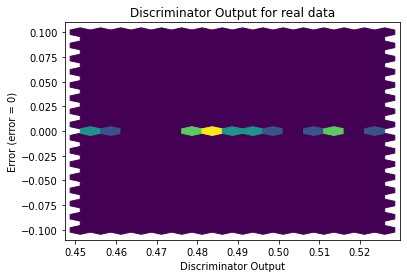

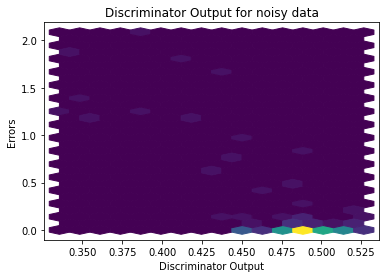

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6026]], device='cuda:0', requires_grad=True)
